## <a href='#section1'>1. Загрузка данных и подготовка их к анализу.</a>
* ### <a href='#section11'>1.1 Предобработка таблицы с визитами</a>
* ### <a href='#section12'>1.2 Предобработка таблицы с заказами</a>
* ### <a href='#section13'>1.3 Предобработка таблицы с затратами</a>

## <a href='#section2'>2. Построение отчетов и расчет метрик.</a>
* ### <a href='#section21'>2.1 Продукт</a>
* ### <a href='#section22'>2.2 Продажи</a>
* ### <a href='#section23'>2.3 Маркетинг</a>

## <a href='#section3'>3. Выводы.</a>

## <a id='section1'>1. Загрузка данных и подготовка их к анализу.</a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

### <a id='section11'>1.1 Предобработка таблицы с визитами.</a>

In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits.duplicated().sum()

0

In [7]:
# Меняем название и порядок расположения столбцов
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']]
visits.head()

,device,source_id,uid,start_ts,end_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00


In [8]:
# Приводим в порядок типы данных столбцов
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['source_id'] = visits['source_id'].astype('int16')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
source_id    359400 non-null int16
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(1), uint64(1)
memory usage: 11.7+ MB


### <a id='section12'>1.2 Предобработка таблицы с заказами</a>

In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
orders.duplicated().sum()

0

In [12]:
# Меняем название и порядок расположения столбцов
orders.columns = ['buy_ts', 'revenue', 'uid']
orders = orders[['uid', 'revenue', 'buy_ts']]
orders.head()

,uid,revenue,buy_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [13]:
# Приводим в порядок типы данных столбцов
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid        50415 non-null uint64
revenue    50415 non-null float64
buy_ts     50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### <a id='section13'>1.3 Предобработка таблицы с затратами.</a>

In [14]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [16]:
costs.duplicated().sum()

0

In [17]:
# Меняем название столбца и приводим в порядок типы данных
costs.columns = ['source_id', 'date', 'costs']
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
date         2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## <a id='section2'>2. Построение отчетов и расчет метрик.</a>

### <a id='section21'>2.1 Продукт</a>

#### Посчитаем количество пользователей в день\неделю\месяц

In [19]:
visits.head()

,device,source_id,uid,start_ts,end_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00


In [20]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['start_ts_day'] = visits['start_ts'].dt.date
visits['start_ts_week'] = pd.DatetimeIndex(visits['start_ts']).week
visits['start_ts_month'] = pd.DatetimeIndex(visits['start_ts']).month
visits['start_ts_year'] = pd.DatetimeIndex(visits['start_ts']).year

dau = visits.groupby(['start_ts_day']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['start_ts_year', 'start_ts_week']).agg({'uid':'nunique'}).mean()
mau = visits.groupby(['start_ts_year', 'start_ts_month']).agg({'uid':'nunique'}).mean()

print('В день сервисом в среднем пользуются {} людей'.format(int(dau)))
print('В неделю сервисом в среднем пользуются {} людей'.format(int(wau)))
print('В месяц сервисом в среднем пользуются {} людей'.format(int(mau)))

sticky_wau = dau / wau
sticky_mau = dau / mau
print('Недельная вовлеченность аудитории: {:.2%}'.format(sticky_wau[0]))
print('Месячная вовлеченность аудитории: {:.2%}'.format(sticky_mau[0]))

В день сервисом в среднем пользуются 907 людей
В неделю сервисом в среднем пользуются 5716 людей
В месяц сервисом в среднем пользуются 23228 людей
Недельная вовлеченность аудитории: 15.88%
Месячная вовлеченность аудитории: 3.91%


#### *Видим, что вовлеченность аудитории невысокая, очевидно, что сервисом пользуются от случая к случаю.*

#### Находим количество сессий в день

In [21]:
day_visits = visits.groupby(['start_ts_day']).agg({'uid':'count'})
print('В день в среднем проходит {} сессий'.format(int(day_visits.mean()[0])))

В день в среднем проходит 987 сессий


#### Узнаем длительность одной сессии

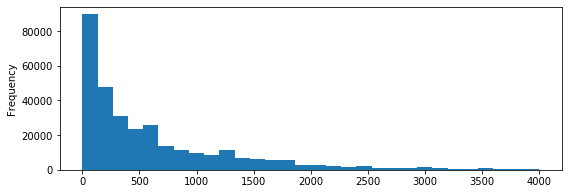

count   323,606.00
mean        714.68
std       1,047.05
min          19.00
25%         120.00
50%         360.00
75%         900.00
max      84,480.00
Name: duration, dtype: float64
Одна сессия длится в среднем 60 секунд


In [22]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
mean_session = visits[visits['duration'] != '0 seconds']['duration'].mode()
durations_of_visits = visits[visits['duration'] != 0]['duration']
durations_of_visits.plot(kind = 'hist', bins = 30, figsize = (9,3), range = (0, 4000))
plt.show()
print(durations_of_visits.describe())
print('Одна сессия длится в среднем {} секунд'.format(mean_session[0]))

#### *В нашем случае распределение длительности далеко от нормального,поэтому мы используем моду*

#### Узнаем как часто возвращаются пользователи

In [23]:
sessions_per_user = len(visits) / len(visits['uid'].unique())
print('В среднем на одного пользователя приходится {:.2f} сессий'.format(sessions_per_user))

В среднем на одного пользователя приходится 1.58 сессий


In [24]:
# данный показатель подтверждает то, что сервисом пользуются редко 
# построим Retention Rate, чтобы посмотреть как часто возвращаются пользователи в рамках когорт
# найдем первую активность пользователей
first_activity = visits.groupby('uid').agg({'start_ts':'min'})
first_activity.columns = ['first_activity']
visits = visits.join(first_activity, on='uid')

In [25]:
#создадим новый датафрейм чтобы не видеть не нужные столбцы
visits_rr = visits[['uid', 'first_activity', 'start_ts']]
visits_rr['first_activity_month'] = visits_rr['first_activity'].astype('datetime64[M]')
visits_rr['start_ts_month'] = visits_rr['start_ts'].astype('datetime64[M]')
visits_rr['lifetime'] = ((visits_rr['start_ts_month'] - visits_rr['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')
visits_rr.head(5)
cohorts_visits = visits_rr.groupby(['first_activity_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts_visits[cohorts_visits['lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count.columns = ['first_activity_month', 'cohort_users']
initial_users_count = initial_users_count.set_index('first_activity_month')

In [26]:
cohorts_visits = cohorts_visits.join(initial_users_count, on = 'first_activity_month')

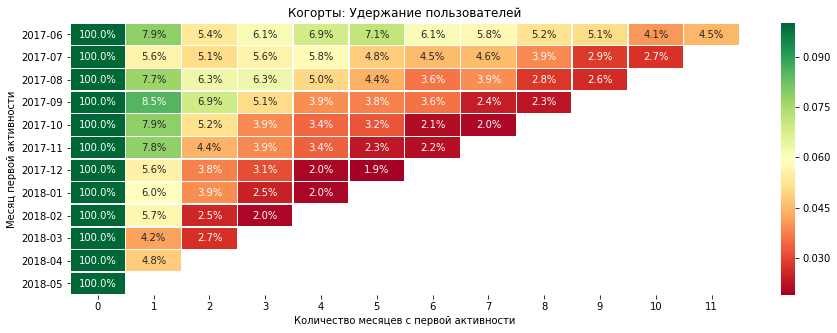

In [29]:
cohorts_visits['retention'] = cohorts_visits['uid'] / cohorts_visits['cohort_users']
retention_pivot = cohorts_visits.pivot_table(index='first_activity_month',columns='lifetime',values='retention',aggfunc='sum')
retention_pivot = retention_pivot.reset_index()
retention_pivot['first_activity_month'] = retention_pivot['first_activity_month'].dt.strftime('%Y-%m')
retention_pivot = retention_pivot.set_index('first_activity_month')
retention_pivot

plt.figure(figsize=(15, 5))
plt.title('Когорты: Удержание пользователей')
sns.heatmap(retention_pivot, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn', vmax = 0.1 )
plt.ylabel('Месяц первой активности')
plt.xlabel('Количество месяцев с первой активности')
plt.show()

### *Как видим более 90% пользователей отваливаются уже после 1 месяца, остаются только очень заинтересованные, видимо они  из месяца в месяц заходят посмотреть даты показа кинопремьер*

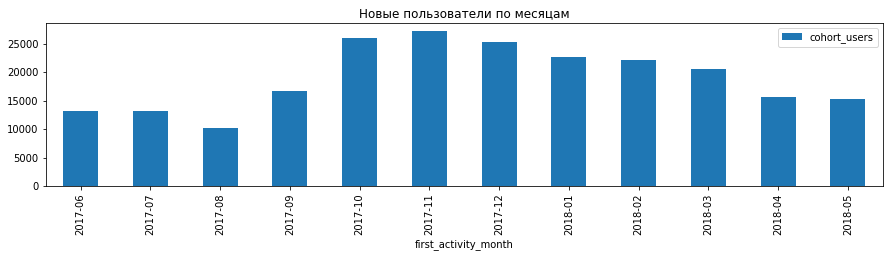

In [27]:
#посмотрим количества новых пользователей по месяцам
cohorts_visits['first_activity_month'] = cohorts_visits['first_activity_month'].dt.strftime('%Y-%m')
cohorts_visits = cohorts_visits.set_index('first_activity_month')
new_users_by_month = cohorts_visits[cohorts_visits['lifetime'] == 0][['cohort_users']]
new_users_by_month.plot(kind = 'bar', figsize = (15,3), title = 'Новые пользователи по месяцам')
plt.show()

### <a id='section22'>2.2 Продажи</a>

### Когда люди начинают покупать

In [28]:
#найдём время и дату первой сессии 
first_sessions = visits.groupby(['uid']).agg({'start_ts':'min', 'source_id':'first'})
first_sessions.columns = ['first_activity', 'first_source']

#найдем время первой покупки
first_orders = orders.groupby(['uid']).agg({'buy_ts':'min'})
first_orders.columns = ['first_buy_ts']

#добавим дату и время первой сессии в информацию по первым заказам
first_orders = first_orders.join(first_sessions,on='uid')

Медиана времени с первой сессии до первой покупки: 16 минут
Среднее время с первой сессии до первой покупки: 16 дней
Мода времени с первой сессии до первой покупки: 1 минута


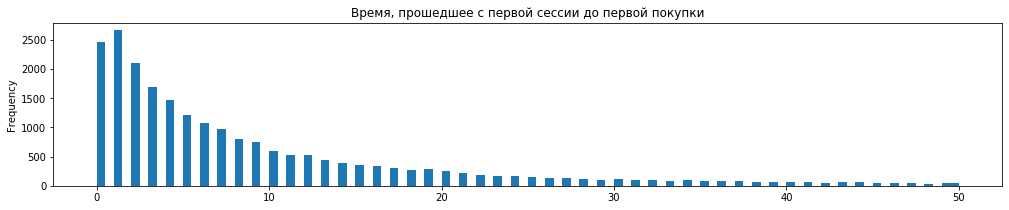

In [29]:
#найдем время, прошедшее с момента первой сессии до первой покупки
first_orders['time_to_first_purchase'] = (first_orders['first_buy_ts'] - first_orders['first_activity']) / np.timedelta64(1, 'm')
first_orders['time_to_first_purchase'].plot(kind = 'hist', bins = 100, range = (0,50), figsize = (17,3), title = 'Время, прошедшее с первой сессии до первой покупки')
print('Медиана времени с первой сессии до первой покупки: {} минут'.format(int(first_orders['time_to_first_purchase'].median())))
print('Среднее время с первой сессии до первой покупки: {} дней'.format(int(first_orders['time_to_first_purchase'].mean()/60/24)))
print('Мода времени с первой сессии до первой покупки: {} минута'.format(int(first_orders['time_to_first_purchase'].mode())))

### *Как видим пользователи стараются быстро совершить покупку, чаще всего делая это в первые же минуты*

### Посчитаем сколько раз пользователи покупают за период

In [30]:
#добавим в orders дату первого заказа и выведем в отдельный столбец месяц первого заказа
orders = orders.join(first_orders, on='uid')
orders['first_buy_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders['first_session_month'] = orders['first_activity'].astype('datetime64[M]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')

In [31]:
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_week'] = orders['buy_ts'].dt.week
orders['buy_year'] = orders['buy_ts'].dt.year
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'buy_ts':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'buy_ts':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'buy_ts':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'buy_ts':'count'}).mean()[0]
print('''В среднем на одного пользователя покупок:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}
'''.format(day_purchases_per_user, week_purchases_per_user, month_purchases_per_user, year_purchases_per_user))

В среднем на одного пользователя покупок:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32



### *Покупок мало, сделаем когортный анализ по количеству покупок на человека - когорты выведем по дате первой сессии*

In [32]:
orders = orders[['uid', 'revenue', 'buy_ts', 'buy_month', 'first_buy_ts', 'first_buy_month', 'first_session_month']]
#посчитаем lifetime заказов
orders['lifetime_fa_b'] = ((orders['buy_month'] - orders['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')

#сгруппируем заказы по когортам и lifetime и высчитаем кол-во покупок и пользователей
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_fa_b']).agg({'uid':['count', 'nunique']}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_fa_b', 'n_orders', 'n_users']

#получим количество заказов на одного пользователя по каждой когорте и кадлому lifetime
orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['n_orders'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['first_session_month'] = orders_grouped_by_cohorts['first_session_month'].dt.strftime('%Y-%m')

#создадим сводную таблицу с когортным анализом количества заказов на пользователя 
cohorts = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_fa_b', values = 'orders_per_user', aggfunc = 'mean')
cohorts['mean'] = cohorts.mean(axis=1)

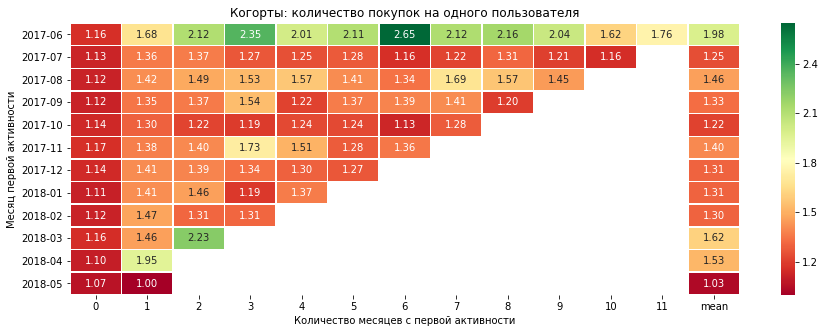

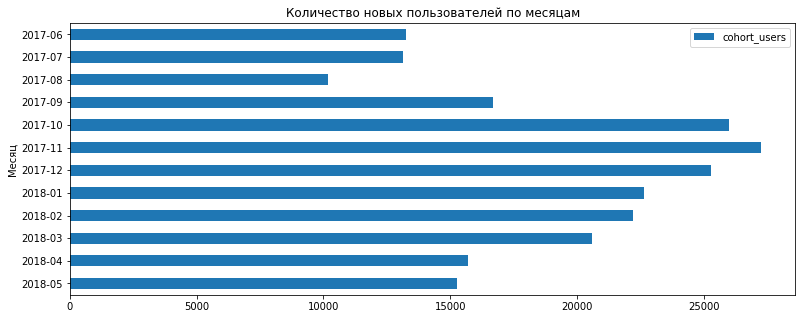

In [33]:
plt.figure(figsize=(15, 5))
plt.title('Когорты: количество покупок на одного пользователя')
sns.heatmap(cohorts, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Количество месяцев с первой активности')
plt.ylabel('Месяц первой активности')
plt.show()
new_users_by_month = new_users_by_month.reset_index()
new_users_by_month = new_users_by_month.sort_values(by= 'first_activity_month', ascending = False)
new_users_by_month = new_users_by_month.set_index('first_activity_month')
new_users_by_month.plot(kind = 'barh', figsize = (13,5), title = 'Количество новых пользователей по месяцам')
plt.ylabel('Месяц')
plt.show()

### *Видим странную картину - именно в тех когортах, где количество новых пользователей самое большое, мы имеем меньшее количество покупок на 1 пользователя*

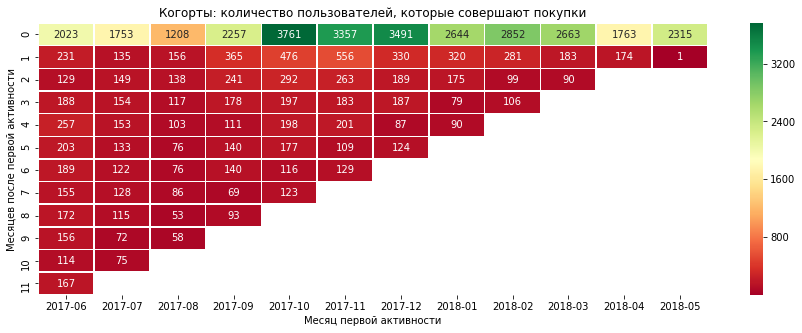

In [34]:
# Сделаем когортный анализ и посмотрим сколько пользователей делают покупки по истечению времени,
#когорты сформируем по времени первой активности, жизнь когорты будем смотреть с первой активности до покупки
orders['first_session_month'] = orders['first_session_month'].dt.strftime('%Y-%m')
cohorts_buy_n_users = orders.pivot_table(index = 'lifetime_fa_b', columns = 'first_session_month', values = 'uid', aggfunc = 'nunique')

plt.figure(figsize=(15, 5))
plt.title('Когорты: количество пользователей, которые совершают покупки')
sns.heatmap(cohorts_buy_n_users, annot=True, fmt=".0f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Месяц первой активности')
plt.ylabel('Месяцев после первой активности')
plt.show()

### *Проанализировав раскладку по месяцам можно увидеть, что покупатели примерно ровно распределяются по месяцам после первого посещения, т.е. с одинаковой вероятностью пользователь может вернуться и совершить покупку и через 2 месяца, и через 4.*

В месяц в среднем покупок на одного пользователя 1.22
В месяц в среднем ВСЕГО покупок 4201


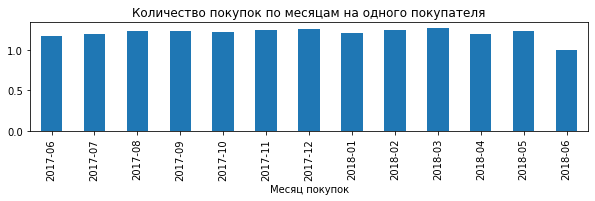

In [35]:
orders_per_user = orders.groupby(['buy_month']).agg({'uid':['count', 'nunique']}).reset_index()
orders_per_user.columns = ['buy_month', 'n_orders', 'n_users']
orders_per_user['orders_per_user'] = orders_per_user['n_orders'] / orders_per_user['n_users']

print('В месяц в среднем покупок на одного пользователя {:.2f}'.format(orders_per_user['orders_per_user'][:-1].mean()))
print('В месяц в среднем ВСЕГО покупок {:.0f}'.format(orders.groupby('buy_month').agg({'uid':'count'})[:-1].mean()[0]))

orders_per_user['buy_month'] = orders_per_user['buy_month'].dt.strftime('%Y-%m')
orders_per_user = orders_per_user.set_index('buy_month')

plt.figure(figsize=(10,2))
orders_per_user['orders_per_user'].plot(kind = 'bar', title = 'Количество покупок по месяцам на одного покупателя')
plt.xlabel('Месяц покупок')
plt.show()

### *Количество покупок по месяцам на одного пользователя равномерно распределено, нет каких-то всплесков или падений, конечно необходимо поднимать этот показатель хотя бы до 2*

### Посчитаем средний чек

Средний чек равен 5.00 $
Далее делаем когортный анализ по среднему чеку(подразумеваем сумму покупок на одного клиента за период)


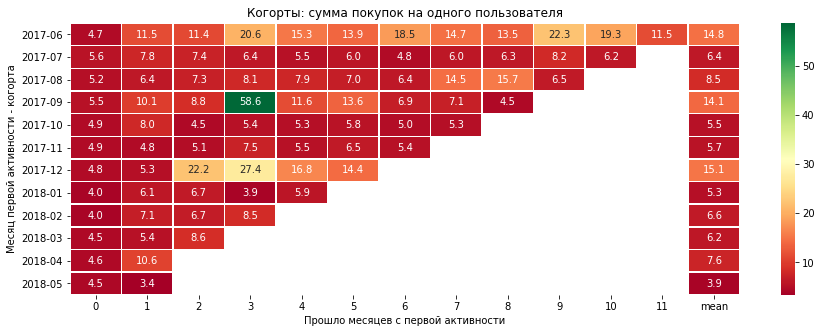

In [36]:
#сгруппируем заказы по когортам и lifetime и суммам покупок на одного пользователя
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_fa_b']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_fa_b', 'revenue_total', 'n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_total'] / orders_grouped_by_cohorts['n_users']

#создадим сводную таблицу с когортным анализом суммы покупок на пользователя 
cohorts_revenue_per_user = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_fa_b', values = 'revenue_per_user', aggfunc = 'mean')
cohorts_revenue_per_user['mean'] = cohorts_revenue_per_user.mean(axis=1)

plt.figure(figsize=(15, 5))
plt.title('Когорты: сумма покупок на одного пользователя')
sns.heatmap(cohorts_revenue_per_user, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности - когорта')

print('Средний чек равен {:.2f} $'.format(orders['revenue'].mean()))
print('Далее делаем когортный анализ по среднему чеку(подразумеваем сумму покупок на одного клиента за период)')

### *Сразу бросается в глаза крупный рост суммы покупок у когорты 2017-09 в декабре, возможно сказалась какая-то локальная акция для них ведь под НГ вышло много премьер. Также хочу отметить хорошие покупки когорты 2017-12 в феврале и марте, скорее всего тут оказало влияние 3 праздников(14,23 февраля и 8 марта)*

### Посчитаем LTV

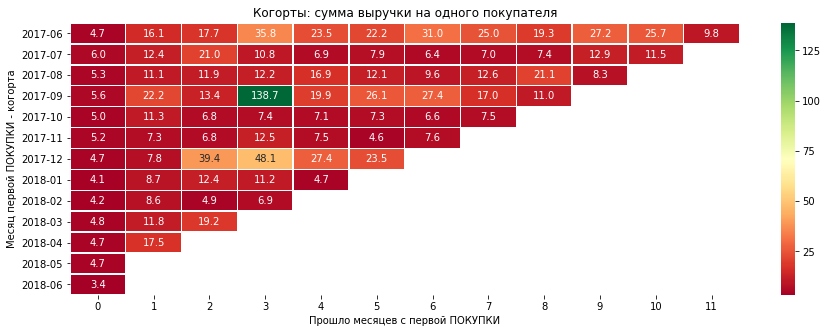

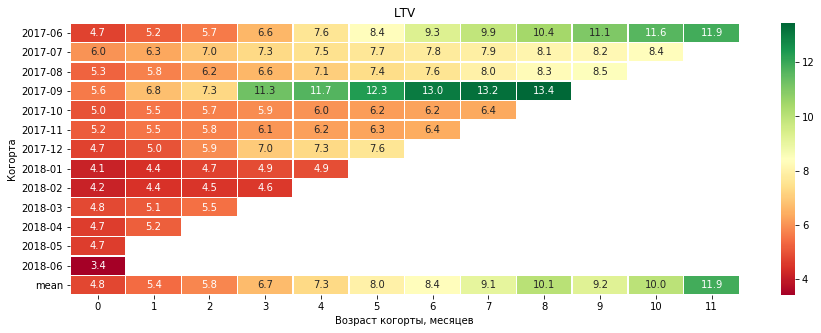

In [37]:
orders['age_cohort'] = ((orders['buy_month'] - orders['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohort_sizes_ltv = orders.groupby('first_buy_month').agg({'uid':'nunique'})
cohort_sizes_ltv.columns = ['cohort_size']
orders_grouped_by_cohorts_ltv = orders.groupby(['first_buy_month', 'age_cohort']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(cohort_sizes_ltv, on='first_buy_month')
orders_grouped_by_cohorts_ltv['ltv'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv['revenue_per_user'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['uid']

#когортный анализ суммы покупок на одного человека (не LTV)
cohorts_revenue_per_user_2 = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'revenue_per_user', aggfunc='mean').reset_index()
cohorts_revenue_per_user_2['first_buy_month'] = cohorts_revenue_per_user_2['first_buy_month'].dt.strftime('%Y-%m')
cohorts_revenue_per_user_2 = cohorts_revenue_per_user_2.set_index('first_buy_month')
plt.figure(figsize=(15, 5))
plt.title('Когорты: сумма выручки на одного покупателя')
sns.heatmap(cohorts_revenue_per_user_2, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Прошло месяцев с первой ПОКУПКИ')
plt.ylabel('Месяц первой ПОКУПКИ - когорта')
plt.show()

#когортный анализ LTV
ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv

plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

### *Как видим когорты 3 летних месяцев и сентября 2017 демонстрируют хорошие показатели LTV на дистанции, а вот дальше стало хуже, особенно разочаровывают январь и февраль 2018*

### <a id='section23'>2.3 Маркетинг</a>

### Сколько денег потратили всего и на каждый источник

Всего потрачено на маркетинг 329131.62 $

Всего потрачено на каждый из источников


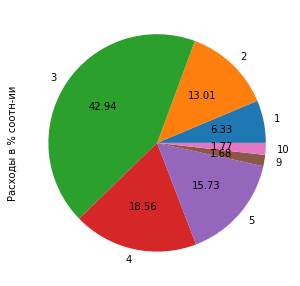

               costs
source_id           
1          20,833.27
2          42,806.04
3         141,321.63
4          61,073.60
5          51,757.10
9           5,517.49
10          5,822.49


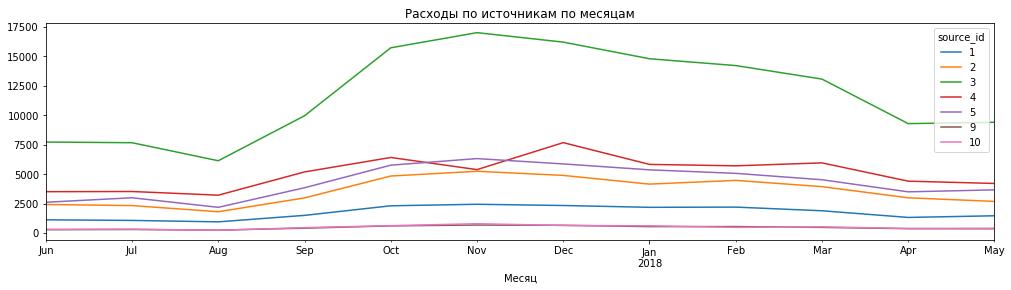

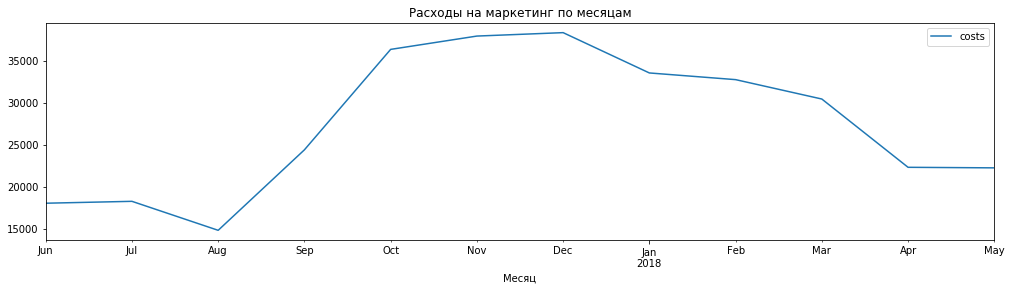

In [38]:
costs['cost_month'] = costs['date'].astype('datetime64[M]')
print('Всего потрачено на маркетинг {} $'.format(costs['costs'].sum()))
print('\nВсего потрачено на каждый из источников')
costs.groupby('source_id').sum().plot(y = 'costs', autopct='%.2f', kind = 'pie', figsize = (5, 5), legend = False)
plt.ylabel('Расходы в % соотн-ии')
plt.show()
print(costs.groupby('source_id').sum())

costs_pivot = costs.pivot_table(index = 'cost_month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(figsize = (17,4), title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').plot(title = 'Расходы на маркетинг по месяцам', figsize = (17,4))
plt.xlabel('Месяц')
plt.show()

### *С сентября 2017 по январь 2018 стоит отметить большой рост расходов на маркетинг (это самые активные месяцы у пользователей в этой сфере), в основном он связан с увеличением трат на привлечени пользователей с источника №3.*

### Сколько стоило привлечение одного покупателя из каждого источника?

In [39]:
print('Кол-во пользователей приходивших в сервис по разному кол-ву источников:')
print(visits.groupby('uid').agg({'source_id':'nunique'})['source_id'].value_counts())

visits_sources_none = visits[['uid', 'start_ts', 'end_ts', 'first_activity', 'source_id']]
visits_sources_none = visits_sources_none.join(first_orders[['first_buy_ts']], on='uid')

Кол-во пользователей приходивших в сервис по разному кол-ву источников:
1    190449
2     28642
3      6792
4      1761
5       442
6        74
7         9
Name: source_id, dtype: int64


In [40]:
visits_sources_none

#напишем функцию проверки сессий на факт покупки
def what_session(row):
    if row['start_ts']<=row['first_buy_ts']<=row['end_ts']:
        return True
    else:
        return False

#найдем сессии в которые совершили покупки
visits_sources_none['buy_session'] = visits_sources_none.apply(what_session, axis = 1)

In [41]:
def before_first_purchase(row):
    if row['start_ts'] <= row['first_buy_ts']:
        return True
    else:
        return False
visits_sources_none['before_first_purchase'] = visits_sources_none.apply(before_first_purchase, axis = 1)

In [42]:
visits_before_first_purchase = visits_sources_none[(visits_sources_none['before_first_purchase'] == True)&(visits_sources_none['buy_session'] == False)]
sources_before_first_purchase = visits_before_first_purchase.pivot_table(index = 'uid', columns = 'source_id', values = 'before_first_purchase', aggfunc = 'sum')
sources_before_first_purchase['sessions_before_first_purchase'] = sources_before_first_purchase.sum(axis = 1)

print('Сессий на 1 пользователя перед покупкой: {:.2f}'.format(sources_before_first_purchase['sessions_before_first_purchase'].mean()))
print('Всего сессий на 1 пользователя: {:.2f}'.format(sessions_per_user))
sources_before_first_purchase = sources_before_first_purchase.fillna(0)
sources_before_first_purchase = sources_before_first_purchase.astype('int')

for i in range(1,11):
    try:
        print('Источник source_{} - используется ВПЛОТЬ до первой покупки {:.1%} пользователями'.format(i, sources_before_first_purchase[i].mean()))
    except:
            print('Источник source_{} - используется ВПЛОТЬ до первой покупки 0.0% пользователями'.format(i))

Сессий на 1 пользователя перед покупкой: 1.77
Всего сессий на 1 пользователя: 1.58
Источник source_1 - используется ВПЛОТЬ до первой покупки 23.2% пользователями
Источник source_2 - используется ВПЛОТЬ до первой покупки 28.9% пользователями
Источник source_3 - используется ВПЛОТЬ до первой покупки 39.8% пользователями
Источник source_4 - используется ВПЛОТЬ до первой покупки 44.2% пользователями
Источник source_5 - используется ВПЛОТЬ до первой покупки 26.4% пользователями
Источник source_6 - используется ВПЛОТЬ до первой покупки 0.0% пользователями
Источник source_7 - используется ВПЛОТЬ до первой покупки 0.0% пользователями
Источник source_8 - используется ВПЛОТЬ до первой покупки 0.0% пользователями
Источник source_9 - используется ВПЛОТЬ до первой покупки 8.4% пользователями
Источник source_10 - используется ВПЛОТЬ до первой покупки 5.7% пользователями


In [43]:
visits_purchase = visits_sources_none[visits_sources_none['buy_session'] == True]
sources_first_purchase = visits_purchase.pivot_table(index = 'uid', columns = 'source_id', values = 'before_first_purchase', aggfunc = 'sum')
sources_first_purchase = sources_first_purchase.fillna(0)
sources_first_purchase = sources_first_purchase.astype('int')

for i in range(1,11):
    try:
        print('Источник source_{} - используется ВО ВРЕМЯ ПОКУПКИ {:.1%} пользователями'.format(i, sources_first_purchase[i].mean()))
    except:
            print('Источник source_{} - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями'.format(i))

Источник source_1 - используется ВО ВРЕМЯ ПОКУПКИ 12.6% пользователями
Источник source_2 - используется ВО ВРЕМЯ ПОКУПКИ 10.5% пользователями
Источник source_3 - используется ВО ВРЕМЯ ПОКУПКИ 24.6% пользователями
Источник source_4 - используется ВО ВРЕМЯ ПОКУПКИ 26.1% пользователями
Источник source_5 - используется ВО ВРЕМЯ ПОКУПКИ 20.6% пользователями
Источник source_6 - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями
Источник source_7 - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями
Источник source_8 - используется ВО ВРЕМЯ ПОКУПКИ 0.0% пользователями
Источник source_9 - используется ВО ВРЕМЯ ПОКУПКИ 2.0% пользователями
Источник source_10 - используется ВО ВРЕМЯ ПОКУПКИ 3.6% пользователями


In [44]:
sources_all_visits = visits_sources_none.pivot_table(index = 'uid', columns = 'source_id', values = 'start_ts', aggfunc = 'count')
sources_all_visits = sources_all_visits.fillna(0)
sources_all_visits = sources_all_visits.astype('int')

for i in range(1,11):
    try:
        print('Источник source_{} - используется {:.1%} пользователями'.format(i, sources_all_visits[i].mean()))
    except:
            print('Источник source_{} - используется 0.0% пользователями'.format(i))

Источник source_1 - используется 15.0% пользователями
Источник source_2 - используется 20.9% пользователями
Источник source_3 - используется 37.5% пользователями
Источник source_4 - используется 44.6% пользователями
Источник source_5 - используется 29.3% пользователями
Источник source_6 - используется 0.0% пользователями
Источник source_7 - используется 0.0% пользователями
Источник source_8 - используется 0.0% пользователями
Источник source_9 - используется 5.8% пользователями
Источник source_10 - используется 4.4% пользователями


In [45]:
visits_sources_none['ts_month'] = visits_sources_none['start_ts'].astype('datetime64[M]')
visits_to_first_purchase = visits_sources_none[visits_sources_none['before_first_purchase'] == True]
visits_to_first_purchase_pivot = visits_to_first_purchase.pivot_table(index = 'ts_month', columns = 'source_id', values = 'start_ts', aggfunc = 'count')
visits_to_first_purchase_pivot['visits_to_purchase'] = visits_to_first_purchase_pivot.sum(axis = 1)
visits_to_first_purchase_pivot
for i in range(1,11):
    try:
        visits_to_first_purchase_pivot[i] = visits_to_first_purchase_pivot[i] / visits_to_first_purchase_pivot['visits_to_purchase']
    except:
        0

In [46]:
visits_to_first_purchase_pivot = visits_to_first_purchase_pivot[[1, 2, 3, 4, 5, 9, 10]].round(2).reset_index()
visits_to_first_purchase_pivot['ts_month'] = visits_to_first_purchase_pivot['ts_month'].dt.strftime('%Y-%m')
visits_to_first_purchase_pivot = visits_to_first_purchase_pivot.set_index('ts_month')

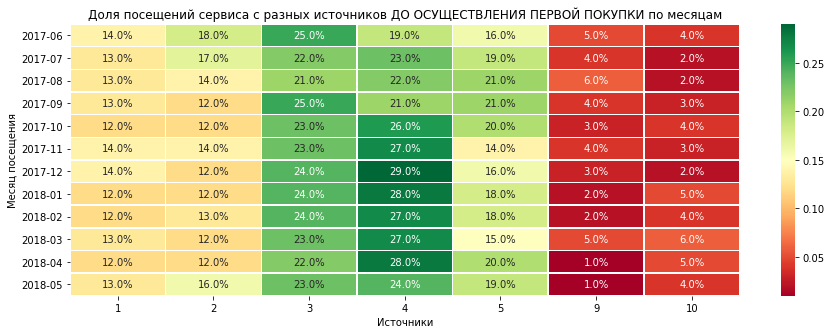

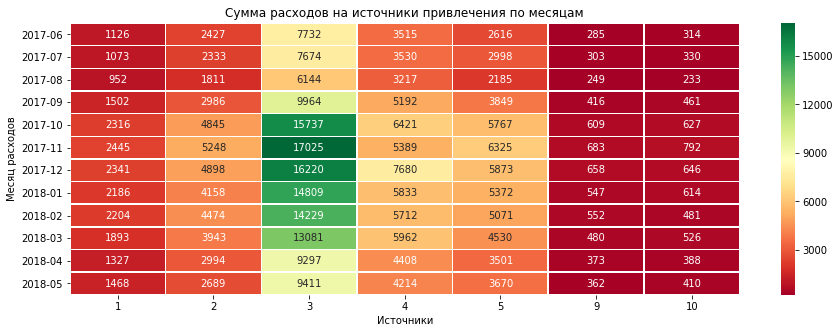

In [47]:
plt.figure(figsize=(15, 5))
plt.title('Доля посещений сервиса с разных источников ДО ОСУЩЕСТВЛЕНИЯ ПЕРВОЙ ПОКУПКИ по месяцам')
sns.heatmap(visits_to_first_purchase_pivot, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц посещения')
plt.show()

costs_pivot = costs_pivot.reset_index()
costs_pivot['cost_month'] = costs_pivot['cost_month'].dt.strftime('%Y-%m')
costs_pivot = costs_pivot.set_index('cost_month')

plt.figure(figsize=(15, 5))
plt.title('Сумма расходов на источники привлечения по месяцам')
sns.heatmap(costs_pivot, annot=True, fmt=".0f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц расходов')
plt.show()

### *Мы не можем учитывать только источник первого посещения или источник по которому совершили саму покупку для определения ценности источников, поэтому мы учитываем использование всех источников перехода на сервис.*

In [48]:
#Посчитаем стоимость привлечения клиентов из разных источников, учитывая источники приведшие к покупке, и посчитаем конверсию по источникам.
uid_first_source = visits_sources_none.groupby('uid').agg({'buy_session':'sum','start_ts':'min','source_id':'first', 'ts_month':'first'})
sources_count = uid_first_source.pivot_table(index = 'ts_month', columns = 'source_id', values = 'buy_session', aggfunc = ['sum', 'count'])

for i in range(1, 11):
    try:
        sources_count[i] = sources_count['sum'][i] / sources_count['count'][i]
    except:
        np.nan
sources_conversion = sources_count[[1, 2, 3, 4, 5, 9, 10]].reset_index()
sources_conversion['ts_month'] = sources_conversion['ts_month'].dt.strftime('%Y-%m')
sources_conversion = sources_conversion.set_index('ts_month')

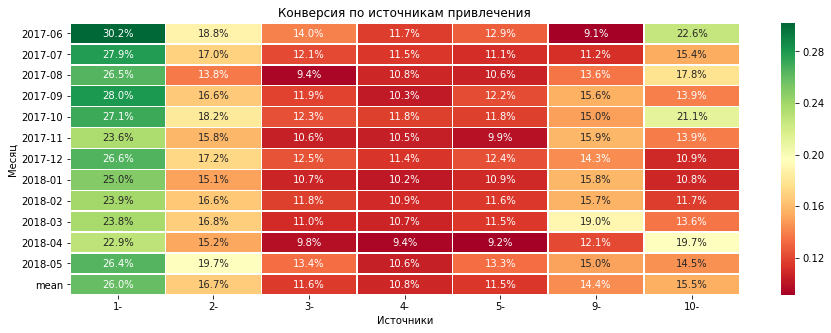

In [49]:
sources_conversion.loc['mean'] = sources_conversion.mean()

plt.figure(figsize=(15, 5))
plt.title('Конверсия по источникам привлечения')
sns.heatmap(sources_conversion, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц')
plt.show()

### *Судя по конверсиям, маркетологам можно порекомендовать вкладываться в источники 1, 2, 9, 10*

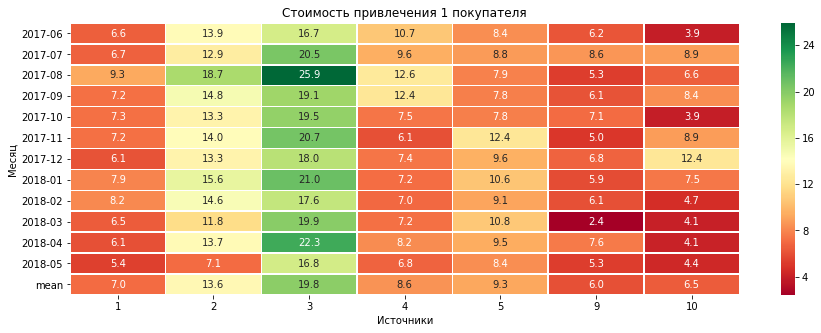

In [50]:
number_purchases = uid_first_source.pivot_table(index = 'ts_month', columns = 'source_id', values = 'buy_session', aggfunc = 'sum')
number_purchases = number_purchases[[1, 2, 3, 4, 5, 9, 10]]

cost_one_buyer_by_sources = pd.DataFrame()
for i in range(1,11):
    try:
        cost_one_buyer_by_sources[i] = costs_pivot[i] / number_purchases[i]
    except:
        continue
cost_one_buyer_by_sources.loc['mean'] = cost_one_buyer_by_sources.mean()
cost_one_buyer_by_sources

plt.figure(figsize=(15, 5))
plt.title('Стоимость привлечения 1 покупателя')
sns.heatmap(cost_one_buyer_by_sources, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц')
plt.show()

### *Видим, что любимый маркетологами источник №3 самый дорогой, необходимо рассмотреть более дешевые источники привлечения - 1, 9, 10, 2 либо работать над конверсией*

### На сколько окупились расходы?

In [51]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.set_index('first_buy_month')
costs_by_month = costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').reset_index()
costs_by_month.columns = ['first_buy_month', 'costs']
costs_by_month = costs_by_month.set_index('first_buy_month')

In [52]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(costs_by_month, on = 'first_buy_month')
orders_grouped_by_cohorts_ltv['cac'] = orders_grouped_by_cohorts_ltv['costs'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv[:-1]
orders_grouped_by_cohorts_ltv['romi'] = orders_grouped_by_cohorts_ltv['ltv'] / orders_grouped_by_cohorts_ltv['cac']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.reset_index()

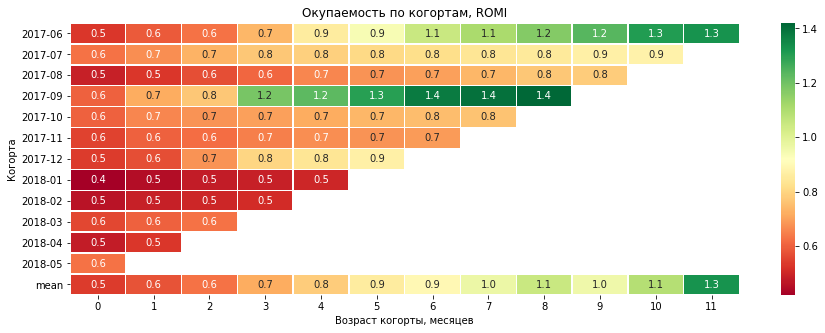

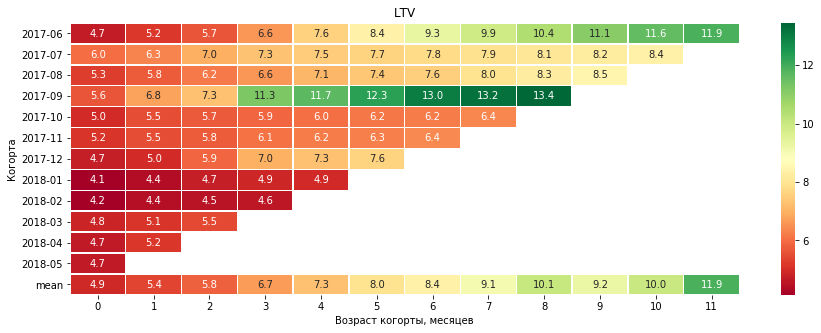

In [53]:
romi = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'romi', aggfunc = 'mean')

romi = romi.cumsum(axis=1)
romi = romi.reset_index()
romi['first_buy_month'] = romi['first_buy_month'].dt.strftime('%Y-%m')
romi = romi.set_index('first_buy_month')
romi.loc['mean'] = romi.mean()
romi = romi.round(2)

plt.figure(figsize=(15, 5))
plt.title('Окупаемость по когортам, ROMI')
sns.heatmap(romi, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv

plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

### *Как видим, затраты на маркетинг окупились лишь в когортах 2017-06 и 2017-09. Маркетологам можно посоветовать обратить внимание на источники привлечения - 1, 9, 10 и поработать над конверсией, сейчас она лучшая у источников 1, 2, 9, 10, благодаря чему по ним лучшая стоимость привлечения 1 клиента.*

## <a id='section3'>3.Выводы</a>

* Пользователи редко используют сервис, в основном все покупки происходят при первом посещении и в течении первой минуты. Как мы посчитали средний чек покупки равен 5$.

* Просто необходимо достигнуть стоимости привлечения клиента по каждому источнику не более 8$. На данный момент лучшие показатели у источников 1, 4, 9 и 10. Очень смущает активное использование маркетологами источника №3: конверсия там порядка 10%, а цена на привлечения пользователя просто огромная, здесь необходимо что-то менять.

* Стоит поработать отдельно с 4 источником, до первой покупки более 40% пользователей посещали сервис через него, тут есть что улучшать в плане конверсии. 

* Выделяется поведение когорты 2017-09, возможно тут сыграла роль какая-то точечная рекламная акция, но выручка именно по ней заметно выше по сравнению с остальными.

* Если подводить общий итог, то можно смело заявить, что в данный момент ситуация не плачевная, точки роста существуют и маркетологам надо только в правильном направлении приложить свои усилия.